In [1]:
from google.colab import files

uploaded = files.upload()


Saving bigquery-public-data.new_york_citibike.citibike_stations.csv to bigquery-public-data.new_york_citibike.citibike_stations.csv
Saving bigquery-public-data.new_york_citibike.citibike_trips.csv to bigquery-public-data.new_york_citibike.citibike_trips.csv
Saving bq-results-20221026-100947-1666779182818.csv to bq-results-20221026-100947-1666779182818.csv
Saving data_for_ab_test.csv to data_for_ab_test.csv


In [ ]:
!pip install pandasql

In [4]:
import pandas as pd
from pandasql import sqldf
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Задание 1

Используя открытую таблицу Google BigQuery bigquery-public-data.hacker_news.comments, напишите SQL-запрос, который выгрузит количество комментариев с 2010 по 2015 год, в которых происходит упоминание России, с группировкой по именам пользователей, оставивших комментарий, в имени которых не содержится заглавных букв и цифр.

In [195]:
df1 = pd.read_csv('bq-results-20221026-100947-1666779182818.csv')

In [196]:
df1.head()

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,9734136,NaN,NaN,1434565400,2015-06-17 18:23:20 UTC,NaN,9733698,True,NaN,0
1,4921158,NaN,NaN,1355496966,2012-12-14 14:56:06 UTC,NaN,4921100,True,NaN,0
2,7500568,NaN,NaN,1396261158,2014-03-31 10:19:18 UTC,NaN,7499385,True,NaN,0
3,8909635,NaN,NaN,1421627275,2015-01-19 00:27:55 UTC,NaN,8901135,True,NaN,0
4,9256463,NaN,NaN,1427204705,2015-03-24 13:45:05 UTC,NaN,9256346,True,NaN,0


In [197]:
df1['time_ts'] = pd.to_datetime(df1['time_ts'])

In [198]:
df1.dtypes

id                       int64
by                      object
author                  object
time                     int64
time_ts    datetime64[ns, UTC]
text                    object
parent                   int64
deleted                 object
dead                    object
ranking                  int64
dtype: object

In [199]:
q = """SELECT author, COUNT(*) AS n_comments
       FROM df1
       WHERE strftime('%Y', time_ts) BETWEEN '2010' AND '2015'
       AND author REGEXP '^[^A-Z0-9]+$'
       AND text REGEXP '[R|r]ussia'
       GROUP BY author 
       ORDER BY n_comments DESC
"""

In [200]:
sqldf(q)

,author,n_comments
0,trhway,4
1,berntb,3
2,jacquesm,3
3,sologoub,3
4,avmich,2
...,...,...
202,wnight,1
203,yardie,1
204,zacharycohn,1
205,zmk_,1


# Задание 2

Используя открытый датасет (набор таблиц) Google BigQuery bigquery-public-data.new_york_citibike напишите SQL-запрос, который выгрузит количество и медианное значение длительности поездок, начавшихся и закончившихся в 2016 году на тех станциях, которые в данный момент позволяют и брать и сдавать велосипеды, с группировкой по месяцу начала поездки и полу клиента.


In [119]:
df2 = pd.read_csv('bigquery-public-data.new_york_citibike.citibike_stations.csv')

In [207]:
df2.head(3)

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,128,MacDougal St & Prince St,5687.04,40.727103,-74.002971,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01
1,224,Spruce St & Nassau St,5137.10,40.711464,-74.005524,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,True,True,True,False,1970-01-01
2,229,Great Jones St,5636.11,40.727434,-73.993790,71.0,"CREDITCARD,KEY",0,False,0,0,0,0,False,False,False,False,1970-01-01


In [121]:
df2['last_reported'] = pd.to_datetime(df2['last_reported'])

In [188]:
df2.dtypes

station_id                            int64
name                                 object
short_name                           object
latitude                            float64
longitude                           float64
region_id                           float64
rental_methods                       object
capacity                              int64
eightd_has_key_dispenser               bool
num_bikes_available                   int64
num_bikes_disabled                    int64
num_docks_available                   int64
num_docks_disabled                    int64
is_installed                           bool
is_renting                             bool
is_returning                           bool
eightd_has_available_keys              bool
last_reported                datetime64[ns]
dtype: object

In [208]:
df3 = pd.read_csv('bigquery-public-data.new_york_citibike.citibike_trips.csv', low_memory=False)

In [209]:
df3.tail(3)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
99997,329.0,2017-10-03 08:34:08,2017-10-03 08:39:37,449.0,W 52 St & 9 Ave,40.764618,-73.987895,520.0,W 52 St & 5 Ave,40.759923,-73.976485,19568.0,Subscriber,1991.0,male,NaN
99998,1891.0,2018-05-10 08:43:09.934,2018-05-10 09:14:41.076,408.0,Market St & Cherry St,40.710762,-73.994004,520.0,W 52 St & 5 Ave,40.759923,-73.976485,21660.0,Subscriber,1980.0,female,NaN
99999,979.0,2015-10-30 12:07:31,2015-10-30 12:23:51,503.0,E 20 St & Park Ave,40.738274,-73.987520,520.0,W 52 St & 5 Ave,40.759923,-73.976485,16540.0,Subscriber,1962.0,male,NaN


In [123]:
df3['starttime'] = pd.to_datetime(df3['starttime'])
df3['stoptime'] = pd.to_datetime(df3['stoptime'])

In [124]:
df3.dtypes

tripduration                      float64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bikeid                            float64
usertype                           object
birth_year                        float64
gender                             object
customer_plan                     float64
dtype: object

Насколько я понял из формулировки задания, то там нужен список станций, которые  позволяют и брать и сдавать велосипеды одновременно. Получается такой список с id станций. 

In [189]:
q = """SELECT station_id
       FROM df2
       WHERE is_renting = 1 AND is_returning = 1
"""

In [190]:
sqldf(q)

,station_id
0,224
1,3050
2,3165
3,3457
4,3490
...,...
1527,247
1528,3122
1529,4406
1530,361


Однако в данных присутствуют id только 3 конечных станций.

In [201]:
q = """SELECT end_station_id, COUNT(*) AS n_count
       FROM df3
       GROUP BY end_station_id
"""

In [202]:
sqldf(q)

,end_station_id,n_count
0,NaN,98861
1,520.0,1134
2,3019.0,3
3,3240.0,2


В списке id станций, которые позволяют брать и сдавать велосипеды такие конечные станции отсутствуют. 

In [203]:
q = """SELECT end_station_id
       FROM df3
       WHERE end_station_id IN (
         SELECT station_id
         FROM df2
         WHERE is_renting = 1 AND is_returning = 1
       )
"""

In [204]:
sqldf(q)

,end_station_id


Однако начальные станции есть. 

In [205]:
q = """SELECT start_station_id
       FROM df3
       WHERE start_station_id IN (
         SELECT station_id
         FROM df2
         WHERE is_renting = 1 AND is_returning = 1
       )
"""

In [206]:
sqldf(q)

,start_station_id
0,259.0
1,514.0
2,445.0
3,282.0
4,480.0
...,...
845,3157.0
846,3157.0
847,531.0
848,408.0


Поэтому у меня возникли сложности с написанием данного запроса. Мое видение финального варианта выглядит как-то так. Вместо двух подзапросов можно использовать view. 

In [177]:
q = """SELECT strftime('%m', starttime) AS month, gender, COUNT(*) AS n_trips, AVG(tripduration) AS avg_duration
       FROM df3
       WHERE  start_station_id IN (
         SELECT station_id
         FROM df2
         WHERE is_renting = 1 AND is_returning = 1
       ) AND end_station_id IN (
         SELECT station_id
         FROM df2
         WHERE is_renting = 1 AND is_returning = 1
       ) AND strftime('%Y', starttime) = '2016' AND
       strftime('%Y', stoptime) = '2016'
       GROUP BY month, gender
"""

# Задание 3

По предоставленному набору данных необходимо определить, какая из двух групп (А или B) показала себя лучше в проведенном АB-тесте при заданном уровне значимости 5%. Каким статистическим тестом Вы воспользуетесь?

In [ ]:
df = pd.read_csv('data_for_ab_test.csv', sep=';')

In [ ]:
df.head()

,dt,ab_test_group,avg_check
0,28.06.2022,A,23540.00
1,29.06.2022,A,22264.78
2,30.06.2022,A,26668.69
3,01.07.2022,A,23455.14
4,02.07.2022,A,38808.54


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dt             114 non-null    object 
 1   ab_test_group  114 non-null    object 
 2   avg_check      114 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.8+ KB


In [ ]:
df.isna().sum()

dt               0
ab_test_group    0
avg_check        0
dtype: int64

In [ ]:
df.describe()

,avg_check
count,114.000000
mean,24123.113772
std,7008.575266
min,6911.150000
25%,20520.260000
50%,23248.570000
75%,25743.930000
max,66945.200000


In [ ]:
df.ab_test_group.value_counts()

A    57
B    57
Name: ab_test_group, dtype: int64

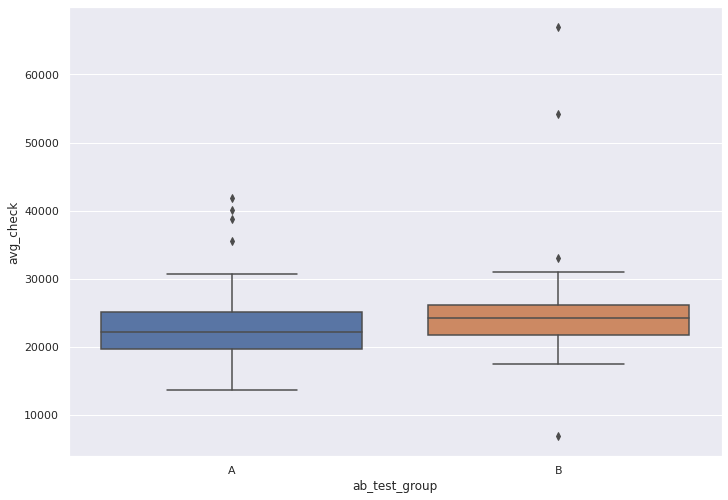

In [ ]:
sns.boxplot(x=df['ab_test_group'], y=df['avg_check']);

Необходимо проверить распределение данных на нормальность. 

In [ ]:
df_a = df.query('ab_test_group=="A"')
df_b = df.query('ab_test_group=="B"')

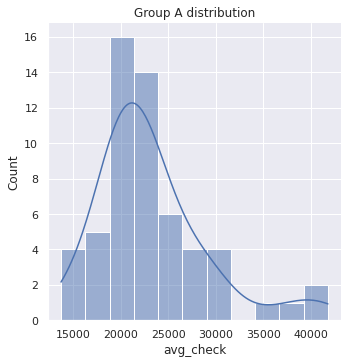

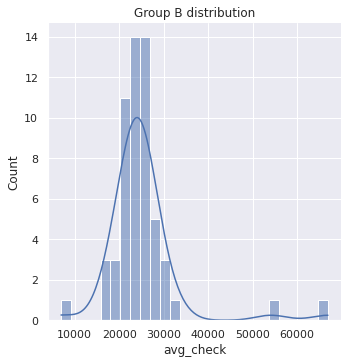

In [ ]:
sns.displot(df_a['avg_check'], kde=True);
plt.title("Group A distribution");

sns.displot(df_b['avg_check'], kde=True);
plt.title("Group B distribution");

Из визуализаций уже видно, что распределения сильно отличаются от нормального и скошены влево. 

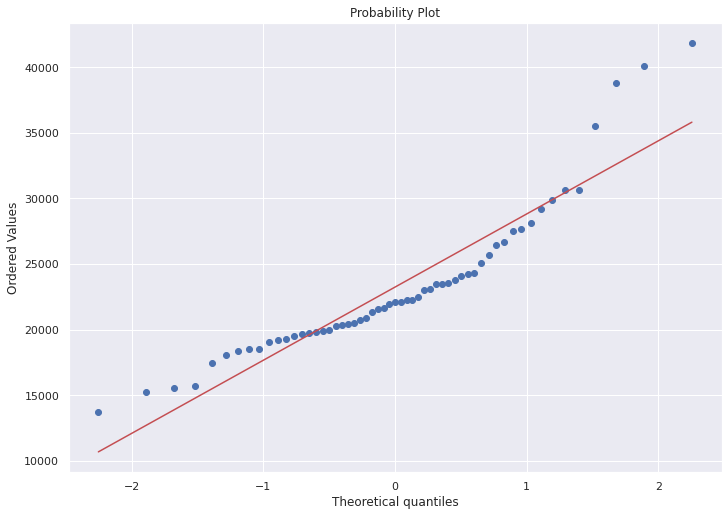

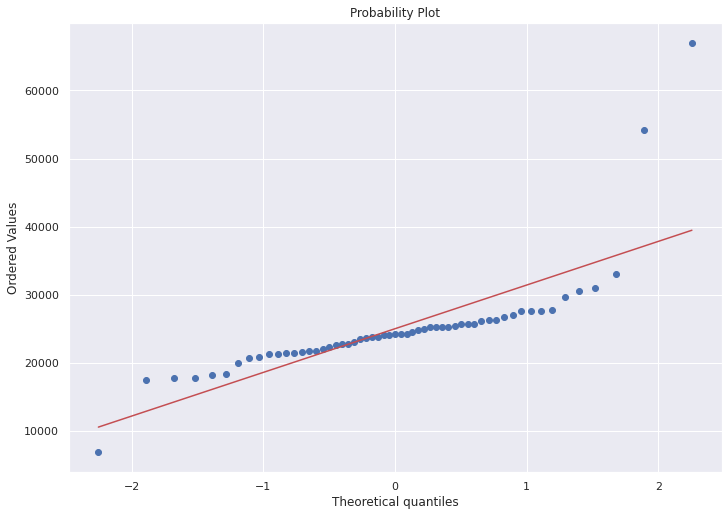

In [ ]:
stats.probplot(df_a['avg_check'], dist="norm", plot=plt)
plt.show()

stats.probplot(df_b['avg_check'], dist="norm", plot=plt)
plt.show()

QQ-плот также показывает, что данные в выборках распределены ненормально. 

In [ ]:
groups = [df_a['avg_check'], df_b['avg_check']]

In [ ]:
for group in groups:
    W_value,p_value = stats.shapiro(group)
    if p_value > 0.01:
        print('Распределение нормальное','W=',round(W_value,4),'p-value',round(p_value,4))
    else:
        print('Распределение ненормальное','W=',round(W_value,4),'p-value',round(p_value,4))

Распределение ненормальное W= 0.8831 p-value 0.0001
Распределение ненормальное W= 0.643 p-value 0.0


Критерий Шапиро-Уилка также это подтверждает.

In [ ]:
stat, p_val = stats.mannwhitneyu(df_a['avg_check'], df_b['avg_check'], alternative = 'two-sided')
if p_val > 0.05:
    print('Статистически значимой разницы нет','\np-value',round(p_val,4),'\nU-критерий',stat)
else:
    print('Разница статистически значима','\np-value',round(p_val,4),'\nU-критерий',stat)

Разница статистически значима 
p-value 0.0263 
U-критерий 1232.0


В связи с тем, что распределение ненормально был выбран непараметрический критерий Манна-Уитни. Получившееся значение p-value меньше 0.05. Группы A и B значимо отличаются друг от друга. 